# Compare Smoke Estimate with Obtained AQI

Another problem is trying to understand how good or bad our smoke estimate might be. Once we have developed our smoke estimate, we should compare our estimate to available AQI (Air Quality Index) data from the US EPA.
When comparing our smoke estimate to the estimate we create from the EPA AQS, we should consider the [nature of AQI measures](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf), what they represent, how they are computed, and how they might be (or not be) related to fire smoke.

In [2]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

Correlation between Smoke Estimate and AQI: 0.6555492697060294


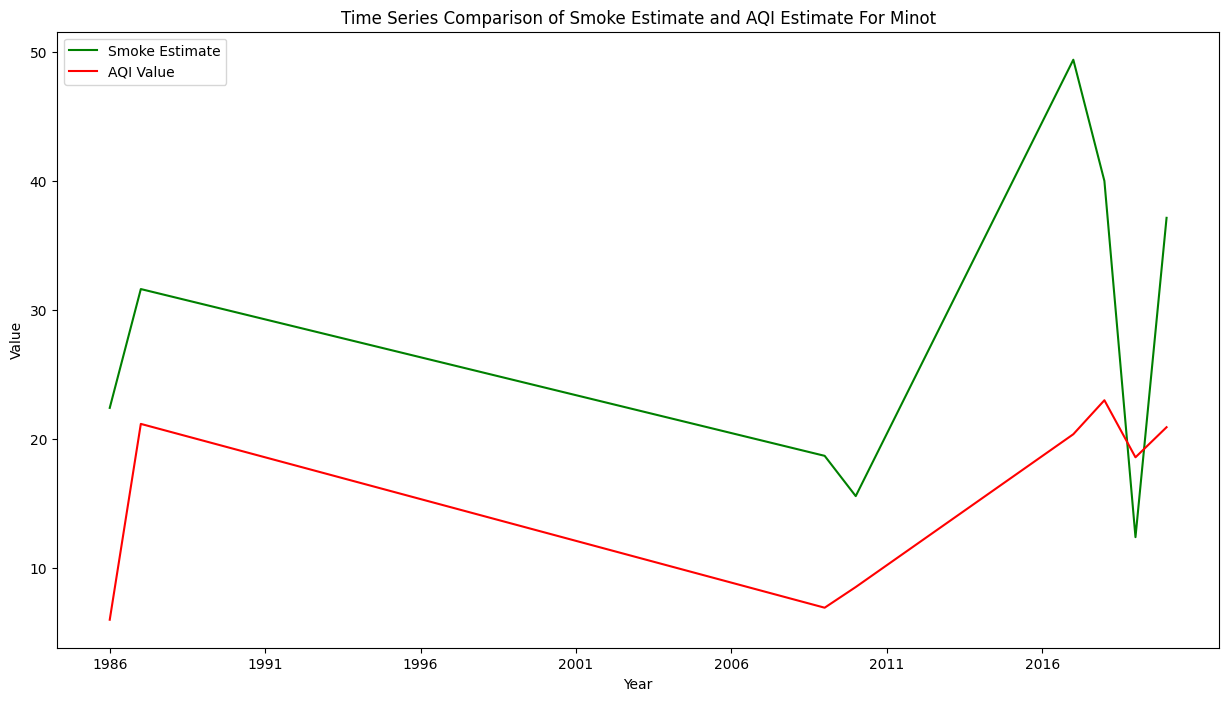

In [3]:
# Read the data from the smoke estimate and AQI data CSV files into DataFrames
smoke_estimate_file = "../intermediate data/annual_smoke_estimate.csv"
aqi_data_file = "../intermediate data/final_aqi_each_year.csv"
smoke_estimate_df = pd.read_csv(smoke_estimate_file)
aqi_df = pd.read_csv(aqi_data_file)

# Merge the two DataFrames on the common column 'Year'
common_column = 'Year'
merged_data = pd.merge(smoke_estimate_df, aqi_df, on=common_column)

# Calculate the correlation between the 'Smoke_estimate' and 'AQI' columns in the merged data
correlation = merged_data['Smoke_estimate'].corr(merged_data['AQI'])
print(f"Correlation between Smoke Estimate and AQI: {correlation}")

# Create a plot to visualize the time series comparison between 'Smoke Estimate' and 'AQI' over the years
plt.figure(figsize=(15, 8))
plt.plot(merged_data['Year'], merged_data['Smoke_estimate'], label='Smoke Estimate', color = 'green')
plt.plot(merged_data['Year'], merged_data['AQI'], label='AQI Value', color = 'red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Comparison of Smoke Estimate and AQI Estimate For Minot')
# Set the x-axis to start from the lowest available year and go up to the highest with a 5-year gap
min_year = min(merged_data['Year'])
max_year = max(merged_data['Year'])
plt.xticks(range(min_year, max_year+1, 5))
plt.legend()
plt.show()

### Important Note

The visualization can easily be misleading if you don't report which years of data points it includes. Here even though we see a trend "from the outlook" but it doesn't include all the years

In [5]:
merged_data[['Year', 'Smoke_estimate', 'AQI']]

,Year,Smoke_estimate,AQI
0,1986,22.419846,6.000000
1,1987,31.629426,21.178571
2,2009,18.703122,6.931034
3,2010,15.580775,8.533333
4,2017,49.405284,20.377474
5,2018,40.006530,23.011546
6,2019,12.399959,18.588506
7,2020,37.150512,20.922170
